In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [15]:
dir_jaune='datas/Indentation_Silicone_Jaune_talc_1_1.txt'
dir_rouge='datas/Indentation_Silicone_Rouge_talc_1_1.txt'
dir_vert='datas/Indentation_Silicone_Vert_talc_1_1.txt'
data_jaune=np.loadtxt(dir_jaune,encoding='latin-1',skiprows=11)
data_rouge=np.loadtxt(dir_rouge,encoding='latin-1',skiprows=11)
data_vert=np.loadtxt(dir_vert,encoding='latin-1',skiprows=11)


## Données de l'essai

In [ ]:
dela_r_jaune=.02
Ediam_jaune=1140
vdiam_jaune=0.07

**Definition des masks pour le recentrage des courbes de chargement**

In [29]:
mask_jaune=data_jaune[:,0]>100
mask_rouge=data_rouge[:,0]>100
mask_vert=data_vert[:,0]>100

**Tracé des courbes de chargements: Efforts en fonction des déplacements**

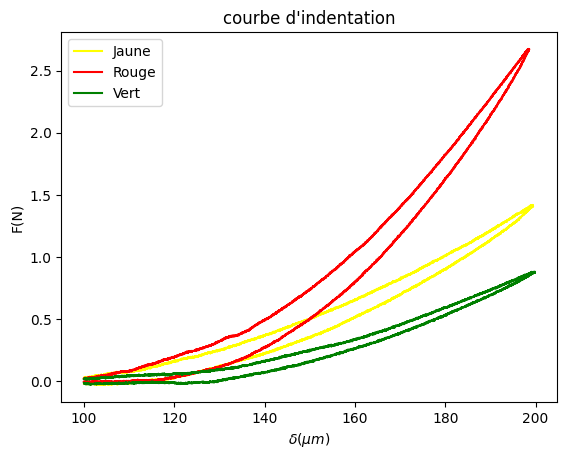

In [ ]:
ax=plt.axes()
ax.plot(data_jaune[mask_jaune][:,0],data_jaune[mask_jaune][:,1],label="Jaune",color="yellow")
ax.plot(data_rouge[mask_rouge][:,0],data_rouge[mask_rouge][:,1],label="Rouge",color="red")
ax.plot(data_vert[mask_vert][:,0],data_vert[mask_vert][:,1],label="Vert",color="green")
ax.set_xlabel("$\\delta(\\mu m)$")
ax.set_ylabel("F(N)")

ax.set_title("courbe d'indentation");
ax.legend();


**Calcul de S, raideur d'indentation**

In [20]:

s_jaune=np.max(data_jaune[:,1]/(np.max(data_jaune[:,0])))
s_rouge=np.max(data_rouge[:,1]/(np.max(data_rouge[:,0])))
s_vert=np.max(data_vert[:,1]/(np.max(data_vert[:,0])))
print("Raideur d'indentation")
print(f"Jaune: {s_jaune}\nRouge: {s_rouge}\nVert: {s_vert}")


Raideur d'indentation
Jaune: 0.007119536473162739
Rouge: 0.013465698794791585
Vert: 0.004420599595320905


**Calcul de la hauteur hc**

In [21]:
hc_jaune=.25*np.max(data_jaune[:,0])
hc_rouge=.25*np.max(data_rouge[:,0])
hc_vert=.25*np.max(data_vert[:,0])
print("Hauteur hc")
print(f"Jaune: {hc_jaune}\nRouge: {hc_rouge}\nVert: {hc_vert}")

Hauteur hc
Jaune: 49.86019825
Rouge: 49.6463095
Vert: 49.95069


**Calcul de l'aire de contact $A_c$**

In [22]:
Ac_jaune=24.5*hc_jaune**2
Ac_rouge=24.5*hc_rouge**2
Ac_vert=24.5*hc_vert**2
print("Aire de contact")
print(f"Jaune: {Ac_jaune}\nRouge: {Ac_rouge}\nVert: {Ac_vert}")

Aire de contact
Jaune: 60907.96455346793
Rouge: 60386.523150759866
Vert: 61129.25007116446


**Calcul du module de Young**

In [ ]:
Er_jaune=.5*np.sqrt(np.pi/Ac_jaune)*s_jaune
Er_rouge=.5*np.sqrt(np.pi/Ac_rouge)*s_rouge
Er_vert=.5*np.sqrt(np.pi/Ac_vert)*s_vert
E_jaune=Er_jaune*Ediam_jaune/(Er_jaune-Ediam_jaune)
Emat=E_jaune*(1-vdiam_jaune**2)

**Calcul de la durété**

In [ ]:
Hbk=np.max(data_jaune[:,1])/Ac_jaune

In [ ]:
np.min(data_jaune)

-0.027637

## Exercice 2:Contact Adhesif

In [ ]:
import numpy as np
import pandas as pd  # juste pour un affichage plus lisible, optionnel

# Noms des colonnes
colonnes = [
    "Echantillon",
    "Rayon_ind_mm",
    "Fmax_mN",
    "Enfmax_um",
    "Fadh_mN",
    "Gamma",
    "Raideur_K_N_m",
    "Module_E_Hz_Pa"
]

# Données du tableau (en reprenant exactement les valeurs de ton PDF)
# Les lignes vides d'échantillon sont remplacées par le nom de l'échantillon au-dessus
donnees = [
    # Echantillon, Rayon,   Fmax,     Enfmax,    Fadh,     Gamma,    K,          E_Hz
    ["Jaune",      2.0,   5.1194,   179.1858,  -1.0025,  -0.3342,  53.8335,   44963.0346],
    ["Jaune",      2.0,   5.1360,   179.6499,  -0.9534,  -0.3178,  55.3803,   46195.1840],
    ["Jaune",      2.0,   5.1416,   180.4877,  -0.9263,  -0.3088,  52.7795,   43923.4236],

    ["Rouge",      2.0,   5.2046,   115.9968,  -1.1985,  -0.3995,  81.7079,   84819.5874],
    ["Rouge",      2.0,   5.2377,   115.0264,  -1.1330,  -0.3777,  82.7777,   86291.7986],
    ["Rouge",      2.0,   5.2488,   117.0311,  -1.1219,  -0.3740,  89.7007,   92704.3160],

    ["Vert",       2.0,   5.0738,   296.5754,  -0.6587,  -0.2196,  33.3846,   21673.7160],
    ["Vert",       2.0,   5.1487,   292.9515,  -0.6380,  -0.2127,  31.2176,   20391.8210],
    ["Vert",       2.0,   5.1500,   297.8616,  -0.6258,  -0.2086,  30.9936,   20077.9754],
]

# Conversion en tableau numpy
tableau_np = np.array(donnees, dtype=object)  # dtype=object pour mélanger texte + nombres

# (Optionnel) conversion en DataFrame pour un affichage plus propre
df = pd.DataFrame(tableau_np, columns=colonnes)




,Echantillon,Rayon_ind_mm,Fmax_mN,Enfmax_um,Fadh_mN,Gamma,Raideur_K_N_m,Module_E_Hz_Pa
0,Jaune,2.0,5.1194,179.1858,-1.0025,-0.3342,53.8335,44963.0346
1,Jaune,2.0,5.136,179.6499,-0.9534,-0.3178,55.3803,46195.184
2,Jaune,2.0,5.1416,180.4877,-0.9263,-0.3088,52.7795,43923.4236
3,Rouge,2.0,5.2046,115.9968,-1.1985,-0.3995,81.7079,84819.5874
4,Rouge,2.0,5.2377,115.0264,-1.133,-0.3777,82.7777,86291.7986
5,Rouge,2.0,5.2488,117.0311,-1.1219,-0.374,89.7007,92704.316
6,Vert,2.0,5.0738,296.5754,-0.6587,-0.2196,33.3846,21673.716
7,Vert,2.0,5.1487,292.9515,-0.638,-0.2127,31.2176,20391.821
8,Vert,2.0,5.15,297.8616,-0.6258,-0.2086,30.9936,20077.9754


In [35]:
df.describe()

,Echantillon,Rayon_ind_mm,Fmax_mN,Enfmax_um,Fadh_mN,Gamma,Raideur_K_N_m,Module_E_Hz_Pa
count,9,9.0,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000
unique,3,1.0,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000
top,Jaune,2.0,5.1194,179.1858,-1.0025,-0.3342,53.8335,44963.0346
freq,3,9.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


**Calcul du rayon de contact de Hertz en m**

In [48]:
df["rayon_hertz"]=(df.Enfmax_um*df.Rayon_ind_mm*1e-9)**(1/2);df.rayon_hertz


0    0.000599
1    0.000599
2    0.000601
3    0.000482
4     0.00048
5    0.000484
6     0.00077
7    0.000765
8    0.000772
Name: rayon_hertz, dtype: object

**Calcul du module de Hertz en Pa**

In [47]:

df["E_hertz"]=df.Raideur_K_N_m/(2*df.rayon_hertz);df.E_hertz


0    44963.056703
1    46195.196695
2     43923.45284
3    84819.566975
4    86291.813831
5    92704.367495
6    21673.728119
7    20391.851277
8    20077.968626
Name: E_hertz, dtype: object

**Calcul du rayon de contact en tenant compte de l'adhésion en m**

In [67]:
df.Fadh_mN=abs(df.Fadh_mN)
df["rayon_JKR"]=((3/4)*(df.Rayon_ind_mm*1e-3/df.E_hertz)*(df.Fmax_mN*1e-3+2*abs(df.Fadh_mN)*1e-3+2*(df.Fadh_mN*1e-3*2*(abs(df.Fadh_mN)*1e-3+df.Fmax_mN*1e-3)**.5)))**(1/3);df.rayon_JKR

0    0.032623
1    0.033142
2    0.032617
3    0.035159
4    0.035459
5    0.036755
6    0.030457
7    0.029602
8    0.029639
Name: rayon_JKR, dtype: object

**Calcul du module d'élasticité en tenant compte de l'adhésion Pa**

In [61]:
df["E_adhesion"]=((df.Raideur_K_N_m**3)/(6*df.Rayon_ind_mm*1e-6*(df.Fmax_mN+2*abs(df.Fadh_mN)+2*(df.Fadh_mN*(df.Fmax_mN+abs(df.Fadh_mN)))**.5)))**.5;df.E_adhesion

0    289.769997
1    294.755198
2    283.610622
3    404.315807
4    406.342633
5    431.288641
6     195.11186
7    185.571171
8    184.320858
Name: E_adhesion, dtype: object

**Calcul de la force totale d'adhésion en mN**

In [63]:
df["F_tot_adh_mN"]=df.Fmax_mN+2*df.Fadh_mN+(4*df.Fadh_mN*df.Fmax_mN+(2*df.Fadh_mN)**2)**.5;df.F_tot_adh_mN

0    154835.224979
1     162915.24268
2    152324.437667
3    278079.809803
4    286268.813412
5    323348.023631
6     81449.786169
7      73620.07784
8     73027.403726
Name: F_tot_adh_mN, dtype: object

**Calcul du paramètre seuil**

In [66]:
z0=.3
df["seuil_JKR"]=(df.Fadh_mN*1e-3/((3/2)*np.pi)/(df.E_adhesion**2*z0**3))**(1/3);df.seuil_JKR

0    0.153588
1    0.154448
2    0.154957
3    0.149514
4    0.150465
5    0.150598
6    0.161387
7    0.161343
8    0.161636
Name: seuil_JKR, dtype: object

À l'issue de ce calcul du paramètre seuil, on conclut que nous sommes dans le **régime transitoire**

**Tracé de l'évolution du rayon de contact en fonction de la force appliqué Fmax**

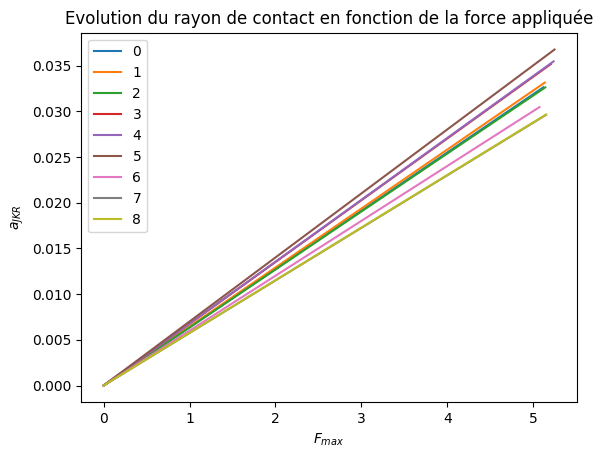

In [75]:
ax1=plt.axes()
ax1.plot(np.linspace(0,df.Fmax_mN,100),np.linspace(0,df.rayon_JKR,100),label=[i for i in range(9)])

ax1.set_xlabel("$F_{max}$")
ax1.set_ylabel("$a_{JKR}$")
ax1.set_title("Evolution du rayon de contact en fonction de la force appliquée")
ax1.legend();